In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

In [2]:
data = pd.read_csv('features_10_sec.csv')

In [3]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000_1.wav,22064,0.342053,0.089037,0.124483,0.003146,1782.622682,116977.082472,2020.556328,84328.680518,...,69.972047,-2.870996,35.479566,0.306076,43.506837,-2.700369,58.693996,2.370232,48.047722,blues
1,blues.00000_2.wav,22064,0.366391,0.088113,0.135369,0.002848,1803.133844,181387.013868,2043.208033,90946.378997,...,37.156276,-0.946113,38.908409,-0.170837,44.038218,-2.291197,39.561969,1.508931,30.957496,blues
2,blues.00000_3.wav,22064,0.341613,0.088826,0.130891,0.002418,1767.406536,92117.458238,1944.426261,77565.158753,...,49.559095,-2.871220,34.696121,0.118136,36.728977,-3.230836,67.714219,0.995681,59.710692,blues
3,blues.00001_1.wav,22064,0.358000,0.090658,0.094405,0.002332,1364.273766,291346.764439,1842.030467,221553.848927,...,62.798435,0.497852,61.236266,0.039325,48.482973,-1.083576,54.454642,-0.112308,53.948946,blues
4,blues.00001_2.wav,22064,0.346125,0.100884,0.087959,0.002073,1581.277785,445452.088998,2125.234003,208450.714793,...,54.984588,0.114600,57.306570,-0.367247,48.318131,-2.646991,40.664638,1.118412,45.825510,blues


In [4]:
# music_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [5]:
data[data['label']=='jazz'][0:10]


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
1500,jazz.00000_1.wav,22064,0.316011,0.085528,0.036642,0.000899,1755.634267,481654.670426,1873.436880,253052.263324,...,25.633839,-2.578685,26.182001,2.271592,46.766502,1.791005,44.522412,-1.467800,71.238262,jazz
1501,jazz.00000_2.wav,22064,0.345450,0.085632,0.071763,0.001672,1755.557633,649123.237717,1947.944539,311014.299848,...,82.247133,2.102577,35.146410,2.921335,48.542981,-2.853173,59.689344,-5.222738,48.061374,jazz
1502,jazz.00000_3.wav,22064,0.373905,0.082270,0.031888,0.001104,1001.429842,153059.243966,1441.268716,137063.724665,...,32.084584,-4.089766,41.385556,-4.474460,39.611232,-4.897463,22.506782,-3.383117,24.036167,jazz
1503,jazz.00001_1.wav,22064,0.264263,0.079102,0.027080,0.000100,1425.726549,299141.958264,1833.513275,264133.407064,...,50.587157,-6.504681,54.370011,-4.077428,43.782013,0.149392,51.605823,6.926061,73.960163,jazz
1504,jazz.00001_2.wav,22064,0.365642,0.087295,0.024624,0.000525,1426.865257,364718.252260,1837.315521,152984.417377,...,42.680087,-3.491846,49.258287,-3.997137,48.609382,-2.144876,51.084450,-3.806241,67.648405,jazz
1505,jazz.00001_3.wav,22064,0.356056,0.087561,0.016659,0.000034,946.179185,88092.528352,1403.111454,110311.041454,...,37.131671,-5.608361,22.242854,-8.149636,35.496073,-7.384018,25.136973,-5.521339,63.053469,jazz
1506,jazz.00002_1.wav,22064,0.257650,0.080451,0.073183,0.001065,1007.179393,97946.346643,1025.323324,47618.428024,...,49.593861,-12.301503,42.818634,-5.902327,52.000031,-2.512276,32.708079,-7.189224,38.485808,jazz
1507,jazz.00002_2.wav,22064,0.255177,0.085747,0.079650,0.000809,1231.867132,272925.888591,1158.100135,84909.660427,...,37.601699,-14.274878,67.946416,-9.959215,38.900115,-2.156143,39.668277,-5.838356,104.195179,jazz
1508,jazz.00002_3.wav,22064,0.291088,0.084949,0.089724,0.000961,955.035870,69068.052888,968.445793,35081.756680,...,33.210483,-10.385965,48.079400,-4.305143,29.995985,-5.842986,43.423972,-12.809320,50.811107,jazz
1509,jazz.00003_1.wav,22064,0.344580,0.077638,0.081369,0.001516,1110.366664,45793.867939,1595.212967,92073.676373,...,25.547024,-7.707465,21.032000,3.782616,16.560730,-2.912227,30.684816,1.785312,35.038264,jazz


In [6]:
dataset = data[data['label'].isin(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])].drop(['filename','length'],axis=1)
dataset.shape

(2997, 58)

In [7]:
# K Neighbors Classification

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [9]:
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
y.shape

(2997,)

In [10]:
X = MinMaxScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
print(X)
X.shape

[[0.36618703 0.75908037 0.28764049 ... 0.08565087 0.52518569 0.06661735]
 [0.40746238 0.74967082 0.3130516  ... 0.05080411 0.5061905  0.04260961]
 [0.36544076 0.75693457 0.30259745 ... 0.10208015 0.49487128 0.08300107]
 ...
 [0.39560482 0.73106801 0.12352586 ... 0.10786708 0.56418742 0.09951583]
 [0.37361555 0.70549162 0.12199385 ... 0.10762951 0.4877025  0.04447097]
 [0.41228065 0.73783604 0.1270863  ... 0.07525743 0.44950478 0.04207431]]


(2997, 57)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2397, 57) (2397,)
Test set: (600, 57) (600,)


In [36]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='minkowski',p=2)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [38]:
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        73
           1       0.93      0.93      0.93        69
           2       0.84      0.90      0.87        58
           3       0.81      0.95      0.87        59
           4       0.85      0.83      0.84        53
           5       0.94      0.88      0.91        51
           6       0.93      0.91      0.92        56
           7       0.88      0.89      0.89        57
           8       0.87      0.90      0.88        58
           9       0.86      0.76      0.81        66

   micro avg       0.89      0.89      0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [40]:
#LogisticRegression

In [41]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.12, solver='lbfgs', verbose=0 ,multi_class='auto').fit(X_train,y_train)
LR

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=0.12, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
y_pred = LR.predict(X_test)

In [59]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.95      0.92      0.93        99
           2       0.65      0.69      0.67        90
           3       0.64      0.67      0.65        81
           4       0.63      0.68      0.65        79
           5       0.87      0.83      0.85        89
           6       0.74      0.91      0.82        76
           7       0.81      0.76      0.78        88
           8       0.69      0.70      0.69        97
           9       0.56      0.50      0.53       102

   micro avg       0.74      0.74      0.74       900
   macro avg       0.74      0.74      0.74       900
weighted avg       0.74      0.74      0.74       900



In [60]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.7355555555555555

In [61]:
#Support Vector Machines

In [62]:
from sklearn import svm

In [63]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [64]:
rbf = svm.SVC(kernel='rbf',degree=1,decision_function_shape='ovo' ).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=1,decision_function_shape='ovo' ).fit(X_train, y_train)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [65]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [66]:
print("Poly_pred:")
print (classification_report(y_test, poly_pred))

Poly_pred:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        73
           1       0.94      0.99      0.96        69
           2       0.66      0.67      0.67        58
           3       0.63      0.63      0.63        59
           4       0.57      0.60      0.59        53
           5       0.88      0.82      0.85        51
           6       0.78      0.91      0.84        56
           7       0.91      0.74      0.82        57
           8       0.69      0.60      0.64        58
           9       0.53      0.58      0.55        66

   micro avg       0.74      0.74      0.74       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.74      0.74      0.74       600



In [67]:
print("Rbf_pred:")
print (classification_report(y_test, rbf_pred))

Rbf_pred:
              precision    recall  f1-score   support

           0       0.94      0.84      0.88        73
           1       0.93      0.96      0.94        69
           2       0.82      0.78      0.80        58
           3       0.66      0.71      0.68        59
           4       0.72      0.77      0.75        53
           5       0.90      0.90      0.90        51
           6       0.87      0.98      0.92        56
           7       0.94      0.82      0.88        57
           8       0.76      0.78      0.77        58
           9       0.68      0.67      0.67        66

   micro avg       0.82      0.82      0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [68]:
# ax = dataset[dataset['label'] == 'jazz'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='DarkBlue', label='jazz');
# dataset[dataset['label'] == 'metal'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Yellow', label='metal', ax=ax);
# dataset[dataset['label'] == 'classical'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Green', label='classical', ax=ax);
# dataset[dataset['label'] == 'blues'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Red', label='blues', ax=ax);
# dataset[dataset['label'] == 'pop'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Pink', label='pop', ax=ax);
# plt.show()

In [69]:
#Decsission Trees

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [71]:
musicTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
musicTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
musicTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
predTree = musicTree.predict(X_test)

In [77]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.615


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.583957 to fit



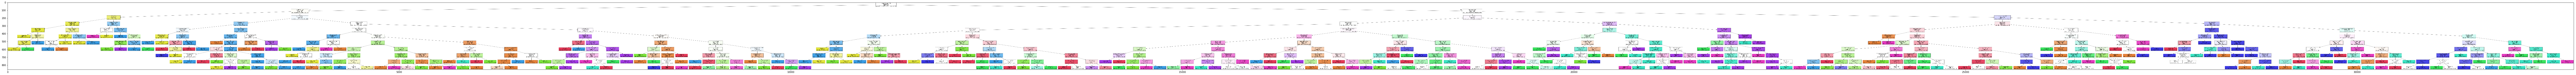

In [78]:
dot_data = StringIO()
filename = "musictree_10sec_10.png"
featureNames = dataset.columns[0:57]
targetNames = dataset["label"].unique().tolist()
out=tree.export_graphviz(musicTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')

In [79]:
#RandomForest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

In [82]:
rforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
predForest = rforest.predict(X_test)
print("Random Forrest Accuracy: ", metrics.accuracy_score(y_test, predForest))

Random Forrest Accuracy:  0.8016666666666666
